In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [18]:
import warnings
# Suppress the specific KMeans memory leak warnings from scikit-learn
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

In [2]:
df = pd.read_excel(r"C:\Users\Emirkan\Desktop\Feature Engineering\Profiles_for_HiperCrop_Marketing.xlsx")

In [3]:
df

,Name,Age,Income Group,Education Level,Location,Tech Proficiency,Social Interaction Preference,Podcast/Video Choice,Charity Focus,Smartphone Choice,Nationality
0,Sarah Miller,34,Upper-middle,Master's in Economics,"New York, USA",Advanced,"LinkedIn, professional forums",Financial news and blockchain updates,Economic development,Samsung Galaxy S21,American
1,Raj Patel,28,Middle,Bachelor's in IT,"Bangalore, India",Intermediate,"Twitter, Reddit","Tech reviews, crypto forecasts",Technology in education,OnePlus 9,Indian
2,Wei Zhang,42,High,PhD in Computer Science,"Shanghai, China",Expert,"Specialized forums, WeChat",Deep dives into blockchain technology,Environmental sustainability,Apple iPhone 12 Pro,Chinese
3,Claudia Espinoza,30,Lower-middle,Associate degree,"Mexico City, Mexico",Beginner,"Facebook, Instagram",Beginner blockchain guides,Children’s health and education,Motorola G8,Mexican
4,Mark Anderson,38,High,MBA,"London, UK",Advanced,"LinkedIn, Twitter","Market trends, investment strategies",Wildlife conservation,Apple iPhone 13,British
...,...,...,...,...,...,...,...,...,...,...,...
66,Tyler Green,21,Lower,Undergraduate in Finance,"London, UK",Intermediate,"Twitter, TikTok","Personal finance, crypto memes",Mental health awareness,Google Pixel 5,British
67,Sofia Rios,22,Middle,Student (Marketing),"Rio de Janeiro, Brazil",Intermediate,"WhatsApp, Instagram","Marketing trends, NFTs",Social equality,Samsung Galaxy A51,Brazilian
68,Michael Lee,45,High,MBA,"San Francisco, USA",Advanced,"LinkedIn, Twitter","Business strategies, blockchain",Education in underdeveloped regions,iPhone 13 Pro Max,American
69,Nina Kaur,48,Upper-middle,PhD in Computer Science,"New Delhi, India",Expert,"LinkedIn, Reddit","AI, blockchain security",Women in STEM,OnePlus 8 Pro,Indian


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (71, 11)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           71 non-null     object
 1   Age                            71 non-null     int64 
 2   Income Group                   71 non-null     object
 3   Education Level                71 non-null     object
 4   Location                       71 non-null     object
 5   Tech Proficiency               71 non-null     object
 6   Social Interaction Preference  71 non-null     object
 7   Podcast/Video Choice           71 non-null     object
 8   Charity Focus                  71 non-null     object
 9   Smartphone Choice              71 non-null     object
 10  Nationality                    71 non-null     object
dtypes: int64(1), object(10)
memory usage: 6.2+ KB
None


In [6]:
# Label encoding for 'Tech Proficiency' Column

In [7]:
le = LabelEncoder()
df['Tech_Proficiency_Encoded'] = le.fit_transform(df['Tech Proficiency'])

In [8]:
# one-hot encoding for non-hierarchical features
onehot_cols = ['Social Interaction Preference', 'Podcast/Video Choice', 'Charity Focus']
df_onehot = pd.get_dummies(df[onehot_cols], drop_first=True)

In [9]:
# Creating the Feature Matrix
X = pd.concat([df['Tech_Proficiency_Encoded'], df_onehot], axis=1)

In [11]:
print("\nFeature Matrix (first 5 rows):")
print(X.head())


Feature Matrix (first 5 rows):
   Tech_Proficiency_Encoded  \
0                         0   
1                         3   
2                         2   
3                         1   
4                         0   

   Social Interaction Preference_Facebook, Instagram  \
0                                              False   
1                                              False   
2                                              False   
3                                               True   
4                                              False   

   Social Interaction Preference_Facebook, Line  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Social Interaction Preference_Facebook, LinkedIn  \
0                                             False   
1                          

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [19]:
wcss = [] # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

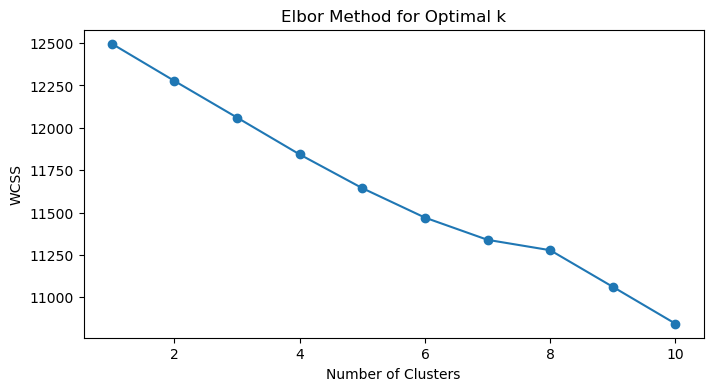

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbor Method for Optimal k')
plt.show();

In [29]:
silhouette_scores = []  # Use a distinct name for the list of scores

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)  # Use the correct variable name here
    print(f'For n_clusters = {k}, the average silhouette score is: {silhouette_avg:.3f}')

For n_clusters = 2, the average silhouette score is: -0.037
For n_clusters = 3, the average silhouette score is: -0.036
For n_clusters = 4, the average silhouette score is: -0.034
For n_clusters = 5, the average silhouette score is: -0.033
For n_clusters = 6, the average silhouette score is: -0.069
For n_clusters = 7, the average silhouette score is: -0.039
For n_clusters = 8, the average silhouette score is: -0.049
For n_clusters = 9, the average silhouette score is: -0.048
For n_clusters = 10, the average silhouette score is: -0.046


In [30]:
optimal_k = 10

In [32]:
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

In [33]:
# Append luster assignments to original dataframe
df['Cluster'] = clusters

In [35]:
centroids_scaled = kmeans_final.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
print("\nCluster Centroids (in original scale):")
print(centroids_original)


Cluster Centroids (in original scale):
[[3.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.46666667e+00 1.66666667e-02 1.66666667e-02 ... 1.66666667e-02
  1.21430643e-17 1.66666667e-02]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


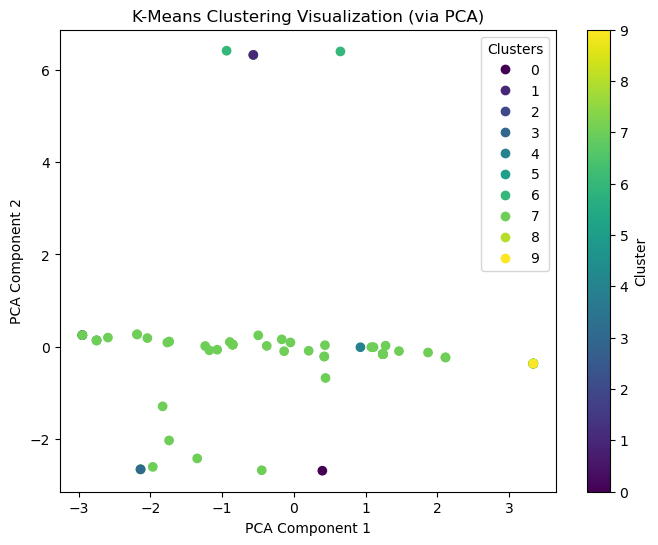

In [36]:
# cluster visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization (via PCA)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.colorbar(label='Cluster')
plt.show();

In [37]:
print("\nCluster vs. Location Cross Tabulation:")
print(pd.crosstab(df['Cluster'], df['Location']))


Cluster vs. Location Cross Tabulation:
Location  Accra, Ghana  Amman, Jordan  Bangalore, India  Berlin, Germany  \
Cluster                                                                    
0                    0              0                 0                0   
1                    0              0                 0                0   
2                    0              0                 0                0   
3                    0              0                 0                0   
4                    0              0                 0                0   
5                    0              0                 0                0   
6                    0              0                 0                0   
7                    1              1                 1                1   
8                    0              0                 0                0   
9                    0              0                 0                0   

Location  Bogotá, Colombia  Casablanca, Morocco


Cluster vs. Location Cross Tabulation:
Location  Accra, Ghana  Amman, Jordan  Bangalore, India  Berlin, Germany  \
Cluster                                                                    
0                    0              0                 0                0   
1                    0              0                 0                0   
2                    0              0                 0                0   
3                    0              0                 0                0   
4                    0              0                 0                0   
5                    0              0                 0                0   
6                    0              0                 0                0   
7                    1              1                 1                1   
8                    0              0                 0                0   
9                    0              0                 0                0   

Location  Bogotá, Colombia  Casablanca, Morocco

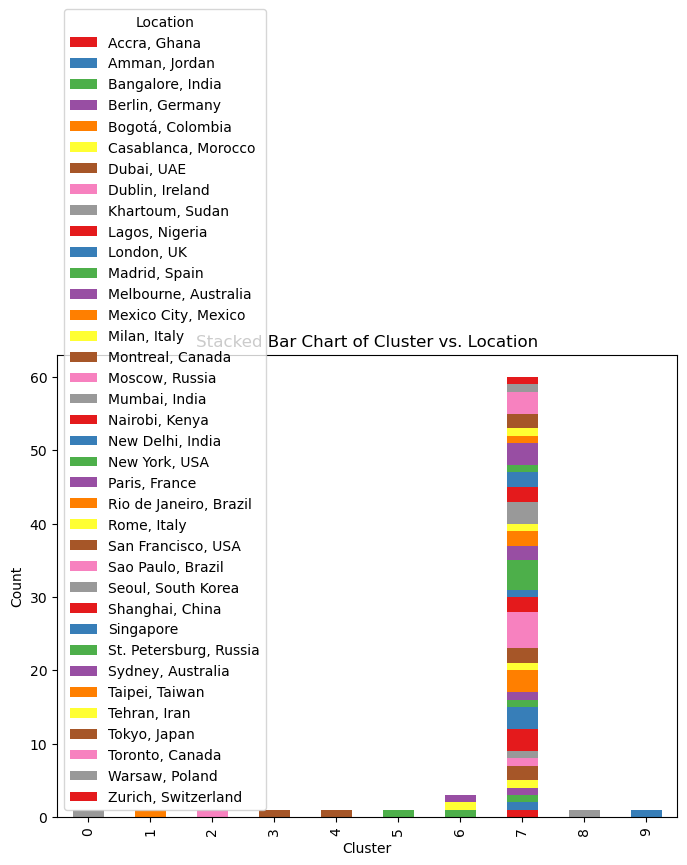

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure your DataFrame 'df' contains the 'Cluster' and 'Location' columns
cross_tab = pd.crosstab(df['Cluster'], df['Location'])
print("\nCluster vs. Location Cross Tabulation:")
print(cross_tab)

# Define a distinct color palette using Seaborn
# This will create as many distinct colors as there are unique 'Location' columns
distinct_colors = sns.color_palette("Set1", n_colors=len(cross_tab.columns))

# Plot a stacked bar chart with the custom colors
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), color=distinct_colors)
plt.title("Stacked Bar Chart of Cluster vs. Location")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Location")
plt.show()



Cluster vs. Location Cross Tabulation:
Location  Accra, Ghana  Amman, Jordan  Bangalore, India  Berlin, Germany  \
Cluster                                                                    
0                    0              0                 0                0   
1                    0              0                 0                0   
2                    0              0                 0                0   
3                    0              0                 0                0   
4                    0              0                 0                0   
5                    0              0                 0                0   
6                    0              0                 0                0   
7                    1              1                 1                1   
8                    0              0                 0                0   
9                    0              0                 0                0   

Location  Bogotá, Colombia  Casablanca, Morocco

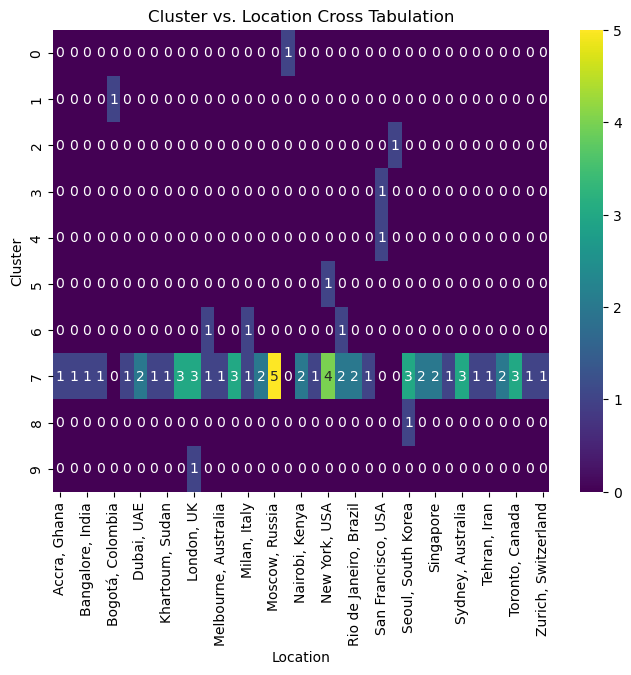

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the cross-tabulation between clusters and location
cross_tab = pd.crosstab(df['Cluster'], df['Location'])
print("\nCluster vs. Location Cross Tabulation:")
print(cross_tab)

# Create a heatmap for the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt="d")
plt.title("Cluster vs. Location Cross Tabulation")
plt.xlabel("Location")
plt.ylabel("Cluster")
plt.show()


In [42]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.0211822  0.01758867 0.01753851]


In [43]:
feature_names = ['Tech Proficiency', 'Social Interaction Preference', 'Podcast/Video Choice', 'Charity Focus']
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i+1}:")
    for feature, loading in zip(feature_names, component):
        print(f"    {feature}: {loading:.3f}")

Principal Component 1:
    Tech Proficiency: 0.469
    Social Interaction Preference: -0.027
    Podcast/Video Choice: -0.056
    Charity Focus: 0.040
Principal Component 2:
    Tech Proficiency: -0.004
    Social Interaction Preference: 0.002
    Podcast/Video Choice: 0.004
    Charity Focus: -0.006
Principal Component 3:
    Tech Proficiency: 0.007
    Social Interaction Preference: -0.029
    Podcast/Video Choice: -0.092
    Charity Focus: -0.060


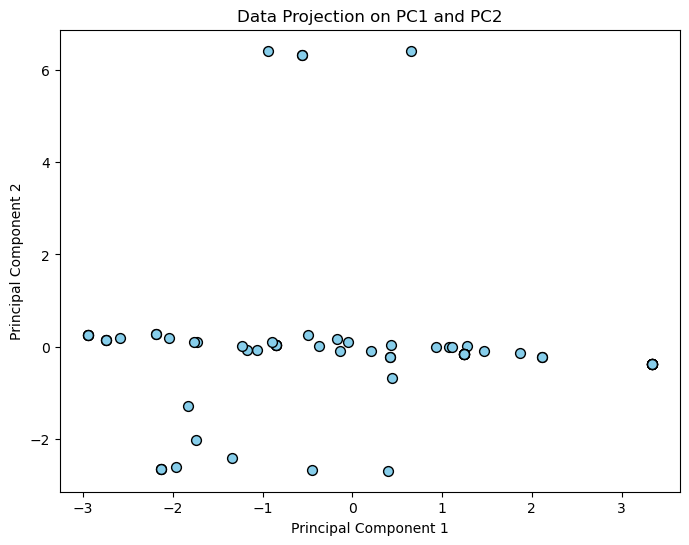

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='skyblue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projection on PC1 and PC2')
plt.show();